In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:\practice_data_set\Titanic.xlsx")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.drop(['PassengerId','Name','SibSp','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [4]:
df.head()

,Pclass,Sex,Age,Parch,Embarked,Survived
0,3,male,22.0,0,S,0
1,1,female,38.0,0,C,1
2,3,female,26.0,0,S,1
3,1,female,35.0,0,S,1
4,3,male,35.0,0,S,0


In [5]:
df.shape

(891, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Parch     891 non-null    int64  
 4   Embarked  889 non-null    object 
 5   Survived  891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [7]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Parch         0
Embarked      2
Survived      0
dtype: int64

In [8]:
df.dropna(subset=['Embarked'],inplace=True)

In [9]:
x = df['Age'].mean()

In [10]:
x

29.64209269662921

In [11]:
x.round()

30.0

In [12]:
df['Age'] = df['Age'].fillna(x.round())

In [13]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Embarked    0
Survived    0
dtype: int64

In [14]:
final = pd.get_dummies(data=df,columns=['Sex','Embarked'],drop_first=True)

In [15]:
final.head()

,Pclass,Age,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,0,True,False,True
1,1,38.0,0,1,False,False,False
2,3,26.0,0,1,False,False,True
3,1,35.0,0,1,False,False,True
4,3,35.0,0,0,True,False,True


In [16]:
X = final.drop('Survived',axis=1)
y = final.Survived

In [17]:
X.head()

,Pclass,Age,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,True,False,True
1,1,38.0,0,False,False,False
2,3,26.0,0,False,False,True
3,1,35.0,0,False,False,True
4,3,35.0,0,True,False,True


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_train.shape

(711, 6)

In [22]:
X_test.shape

(178, 6)

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
model = BernoulliNB()

In [25]:
model.fit(X_train,y_train)

BernoulliNB()

In [26]:
model.score(X_test,y_test)

0.797752808988764

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [28]:
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [29]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gb = GaussianNB()

In [32]:
gb.fit(X_test,y_test)

GaussianNB()

In [33]:
gb.score(X_train,y_train)

0.7805907172995781

In [34]:
gb.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
mnb = MultinomialNB()

In [37]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [38]:
mnb.score(X_test,y_test)

0.6910112359550562

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test,y_pred)

In [41]:
import seaborn as sns

<Axes: >

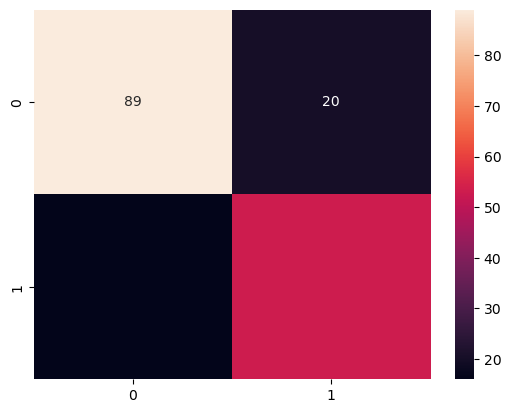

In [43]:
sns.heatmap(cm,annot=True)